In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dl_0 = pd.read_csv("inc0.csv", header=1, index_col=0)

In [21]:
dl_20 = pd.read_csv("inc20.csv", header=1, index_col=0)

In [22]:
dl_40 = pd.read_csv("inc40.csv", header=1, index_col=0)

In [23]:
dl_60 = pd.read_csv("inc60.csv", header=1, index_col=0)

In [24]:
dl_80 = pd.read_csv("inc80.csv", header=1, index_col=0)

In [25]:
dl_100 = pd.read_csv("inc100.csv", header=1, index_col=0)

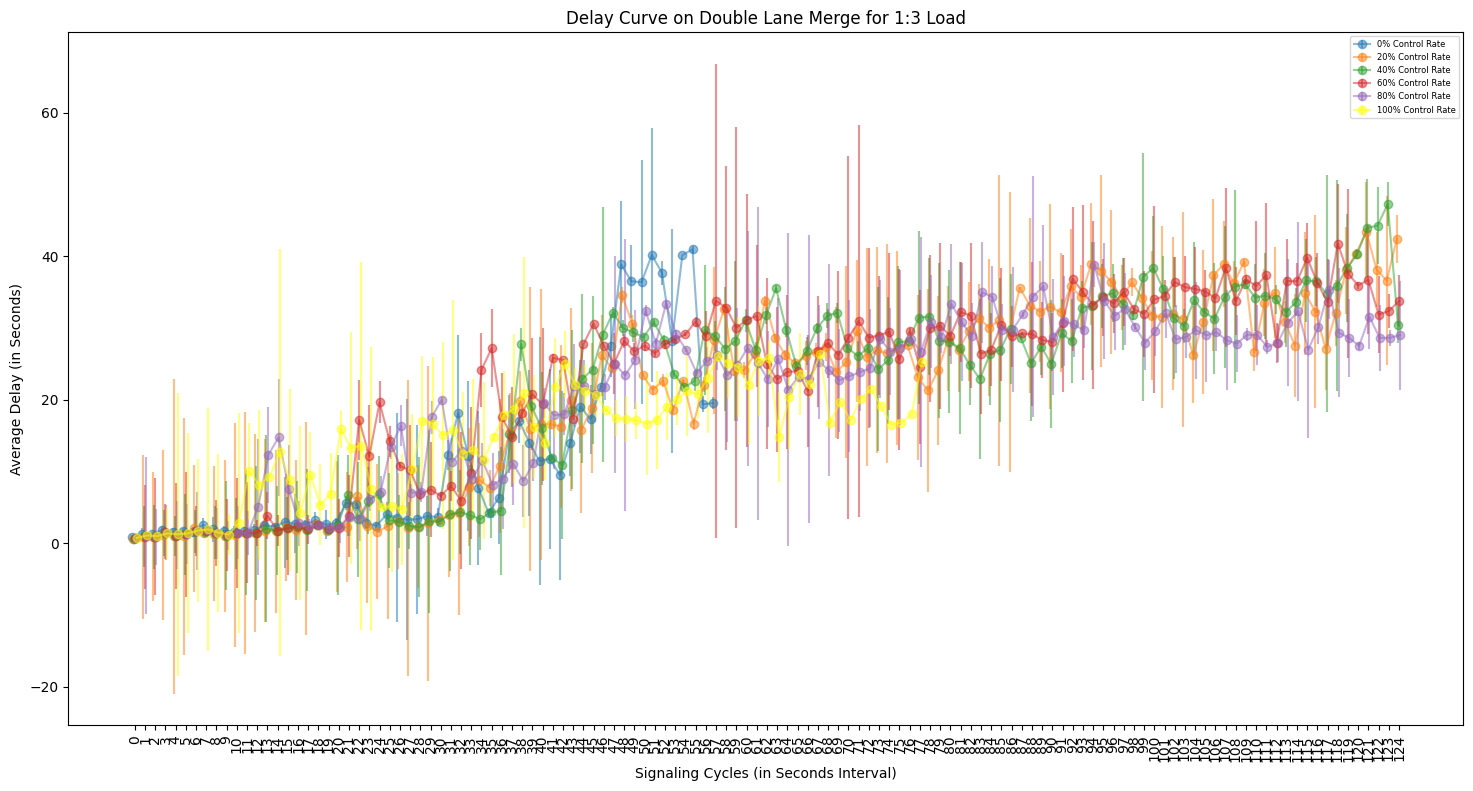

In [27]:
from matplotlib.ticker import MaxNLocator

#fig = plt.figure(figsize=(10, 5))  # Adjust the size as necessary
#ax = fig.add_subplot(1, 1, 1)
#ax.xaxis.set_major_locator(MaxNLocator(nbins=10))

fig = plt.figure(figsize=(18, 9))  # Increase figure size
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))  # You already have this to control the number of bins

#fig = plt.figure()
df_0 = dl_0[dl_0.index != "SUM"]
df_20 = dl_20[dl_20.index != "SUM"]
df_40 = dl_40[dl_40.index != "SUM"]
df_60 = dl_60[dl_60.index != "SUM"]
df_80 = dl_80[dl_80.index != "SUM"]
df_100 = dl_100[dl_100.index != "SUM"]

df_0_Avg = df_0["DELAYAVG(ALL)"].groupby("TIMEINT").mean()
df_20_Avg = df_20["DELAYAVG(ALL)"].groupby("TIMEINT").mean()
df_40_Avg = df_40["DELAYAVG(ALL)"].groupby("TIMEINT").mean()
df_60_Avg = df_60["DELAYAVG(ALL)"].groupby("TIMEINT").mean()
df_80_Avg = df_80["DELAYAVG(ALL)"].groupby("TIMEINT").mean()
df_100_Avg = df_100["DELAYAVG(ALL)"].groupby("TIMEINT").mean()

df_0_Std = df_0["DELAYAVG(ALL)"].groupby("TIMEINT").std()
df_20_Std = df_20["DELAYAVG(ALL)"].groupby("TIMEINT").std()
df_40_Std = df_40["DELAYAVG(ALL)"].groupby("TIMEINT").std()
df_60_Std = df_60["DELAYAVG(ALL)"].groupby("TIMEINT").std()
df_80_Std = df_80["DELAYAVG(ALL)"].groupby("TIMEINT").std()
df_100_Std = df_100["DELAYAVG(ALL)"].groupby("TIMEINT").std()

offset = 0.1  # Adjust as needed
# Generate x values for each dataset
x_df_0 = np.arange(len(df_0_Avg))
x_df_20 = np.arange(len(df_20_Avg))
x_df_40 = np.arange(len(df_40_Avg))
x_df_60 = np.arange(len(df_60_Avg))
x_df_80 = np.arange(len(df_80_Avg))
x_df_100 = np.arange(len(df_100_Avg))

df_0_Avg.index = df_0_Avg.index.str.extract('(\d+)-')[0].astype(int)
df_20_Avg.index = df_20_Avg.index.str.extract('(\d+)-')[0].astype(int)
df_40_Avg.index = df_40_Avg.index.str.extract('(\d+)-')[0].astype(int)
df_60_Avg.index = df_60_Avg.index.str.extract('(\d+)-')[0].astype(int)
df_80_Avg.index = df_80_Avg.index.str.extract('(\d+)-')[0].astype(int)
df_100_Avg.index = df_100_Avg.index.str.extract('(\d+)-')[0].astype(int)
df_0_Avg.sort_index(inplace=True)
df_20_Avg.sort_index(inplace=True)
df_40_Avg.sort_index(inplace=True)
df_60_Avg.sort_index(inplace=True)
df_80_Avg.sort_index(inplace=True)
df_100_Avg.sort_index(inplace=True)
x_values = np.arange(len(df_60_Avg))
#plt.xticks(x_values, df_60_Avg.index, rotation=90)

# Plot each dataset with error bars and an offset
plt.errorbar(x_df_0 - 3*offset, df_0_Avg, yerr=df_0_Std, label="0% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_df_20 - 2*offset, df_20_Avg, yerr=df_20_Std, label="20% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_df_40 - offset, df_40_Avg, yerr=df_40_Std, label="40% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_df_60, df_60_Avg, yerr=df_60_Std, label="60% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_df_80 + offset, df_80_Avg, yerr=df_80_Std, label="80% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_df_100 + 2*offset, df_100_Avg, yerr=df_100_Std, label="100% Control Rate", fmt='-o', alpha=0.5, color='yellow')

max_length = max(len(df_20_Avg), len(df_40_Avg), len(df_60_Avg), len(df_80_Avg))

# Generate sequential numbers starting from 0 up to the maximum length minus one
sequential_labels = range(max_length)

# Use plt.xticks() to set the new labels
# Assuming df_60_Avg has the max length or you choose it as a reference
plt.xticks(ticks=x_values, labels=sequential_labels, rotation=90)

plt.legend(fontsize=6)
#plt.xticks(x_values_eq_net, dl_eq_net_Avg.index, rotation=90)
#plt.xticks(range(len(df_60_Avg.index)), df_60_Avg.index, rotation=90)
plt.ylabel("Average Delay (in Seconds)")
plt.xlabel ("Signaling Cycles (in Seconds Interval)")
plt.title("Delay Curve on Double Lane Merge for 1:3 Load")
plt.show()
plt.close(fig)

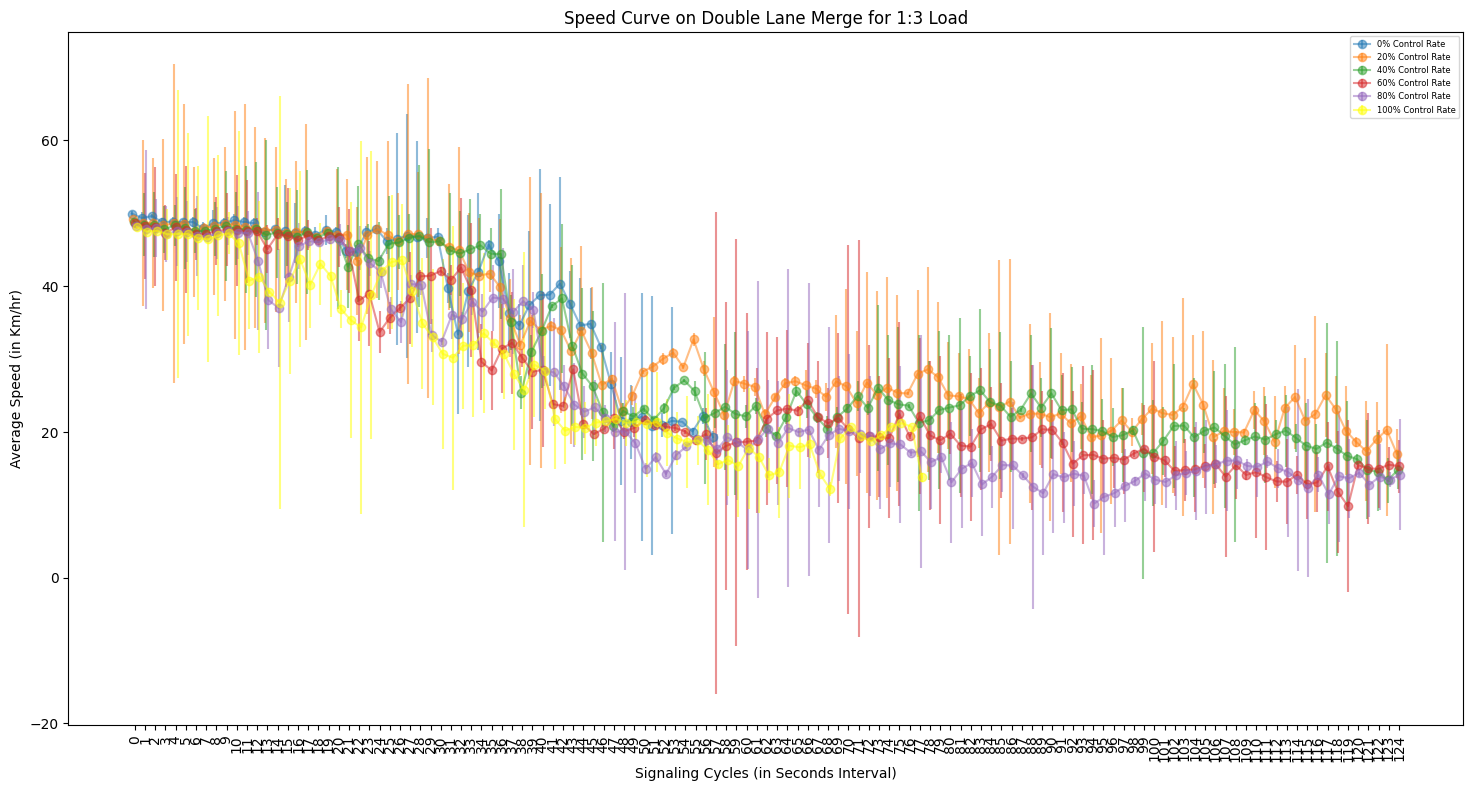

In [28]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(18, 9))  # Adjust the size as necessary
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))


#fig = plt.figure()
sp_0 = dl_0[dl_0.index != "SUM"]
sp_20 = dl_20[dl_20.index != "SUM"]
sp_40 = dl_40[dl_40.index != "SUM"]
sp_60 = dl_60[dl_60.index != "SUM"]
sp_80 = dl_80[dl_80.index != "SUM"]
sp_100 = dl_100[dl_100.index != "SUM"]

sp_0_Avg = sp_0["SPEEDAVG(ALL)"].groupby("TIMEINT").mean()
sp_20_Avg = sp_20["SPEEDAVG(ALL)"].groupby("TIMEINT").mean()
sp_40_Avg = sp_40["SPEEDAVG(ALL)"].groupby("TIMEINT").mean()
sp_60_Avg = sp_60["SPEEDAVG(ALL)"].groupby("TIMEINT").mean()
sp_80_Avg = sp_80["SPEEDAVG(ALL)"].groupby("TIMEINT").mean()
sp_100_Avg = sp_100["SPEEDAVG(ALL)"].groupby("TIMEINT").mean()

sp_0_Std = sp_0["SPEEDAVG(ALL)"].groupby("TIMEINT").std()
sp_20_Std = sp_20["SPEEDAVG(ALL)"].groupby("TIMEINT").std()
sp_40_Std = sp_40["SPEEDAVG(ALL)"].groupby("TIMEINT").std()
sp_60_Std = sp_60["SPEEDAVG(ALL)"].groupby("TIMEINT").std()
sp_80_Std = sp_80["SPEEDAVG(ALL)"].groupby("TIMEINT").std()
sp_100_Std = sp_100["SPEEDAVG(ALL)"].groupby("TIMEINT").std()

offset = 0.1  # Adjust as needed
# Generate x values for each dataset
x_sp_0 = np.arange(len(sp_0_Avg))
x_sp_20 = np.arange(len(sp_20_Avg))
x_sp_40 = np.arange(len(sp_40_Avg))
x_sp_60 = np.arange(len(sp_60_Avg))
x_sp_80 = np.arange(len(sp_80_Avg))
x_sp_100 = np.arange(len(sp_100_Avg))

sp_0_Avg.index = sp_0_Avg.index.str.extract('(\d+)-')[0].astype(int)
sp_20_Avg.index = sp_20_Avg.index.str.extract('(\d+)-')[0].astype(int)
sp_40_Avg.index = sp_40_Avg.index.str.extract('(\d+)-')[0].astype(int)
sp_60_Avg.index = sp_60_Avg.index.str.extract('(\d+)-')[0].astype(int)
sp_80_Avg.index = sp_80_Avg.index.str.extract('(\d+)-')[0].astype(int)
sp_100_Avg.index = sp_100_Avg.index.str.extract('(\d+)-')[0].astype(int)

sp_0_Avg.sort_index(inplace=True)
sp_20_Avg.sort_index(inplace=True)
sp_40_Avg.sort_index(inplace=True)
sp_60_Avg.sort_index(inplace=True)
sp_80_Avg.sort_index(inplace=True)
sp_100_Avg.sort_index(inplace=True)
x_values = np.arange(len(sp_80_Avg))
#plt.xticks(x_values, df_80_Avg.index, rotation=90)

# Plot each dataset with error bars and an offset
plt.errorbar(x_sp_0 - 3*offset, sp_0_Avg, yerr=df_0_Std, label="0% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_sp_20 - 2*offset, sp_20_Avg, yerr=df_20_Std, label="20% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_sp_40 - offset, sp_40_Avg, yerr=df_40_Std, label="40% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_sp_60, sp_60_Avg, yerr=df_60_Std, label="60% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_sp_80 + offset, sp_80_Avg, yerr=df_80_Std, label="80% Control Rate", fmt='-o', alpha=0.5)
plt.errorbar(x_sp_100 + 2*offset, sp_100_Avg, yerr=df_100_Std, label="100% Control Rate", fmt='-o', alpha=0.5, color="yellow")
max_length = max(len(df_20_Avg), len(df_40_Avg), len(df_60_Avg), len(df_80_Avg))

# Generate sequential numbers starting from 0 up to the maximum length minus one
sequential_labels = range(max_length)

# Use plt.xticks() to set the new labels
# Assuming df_60_Avg has the max length or you choose it as a reference
plt.xticks(ticks=x_values, labels=sequential_labels, rotation=90)

plt.legend(fontsize=6)
#plt.xticks(x_values_eq_net, dl_eq_net_Avg.index, rotation=90)
#plt.xticks(range(len(sp_60_Avg.index)), sp_60_Avg.index, rotation=90)
plt.ylabel("Average Speed (in Km/hr)")
plt.xlabel ("Signaling Cycles (in Seconds Interval)")
plt.title("Speed Curve on Double Lane Merge for 1:3 Load")
plt.show()
plt.close(fig)

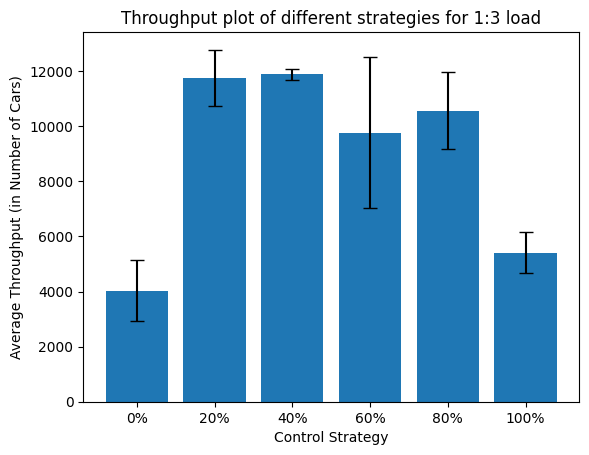

In [34]:
arr_0 = dl_0[dl_0.index == "SUM"]
arr_20 = dl_20[dl_20.index == "SUM"]
arr_40 = dl_40[dl_40.index == "SUM"]
arr_60 = dl_60[dl_60.index == "SUM"]
arr_80 = dl_80[dl_80.index == "SUM"]
arr_100 = dl_100[dl_100.index == "SUM"]

arr_0_Avg = arr_0["VEHARR(ALL)"].groupby("TIMEINT").mean()
arr_20_Avg = arr_20["VEHARR(ALL)"].groupby("TIMEINT").mean()
arr_40_Avg = arr_40["VEHARR(ALL)"].groupby("TIMEINT").mean()
arr_60_Avg = arr_60["VEHARR(ALL)"].groupby("TIMEINT").mean()
arr_80_Avg = arr_80["VEHARR(ALL)"].groupby("TIMEINT").mean()
arr_100_Avg = arr_100["VEHARR(ALL)"].groupby("TIMEINT").mean()

arr_0_std = arr_0["VEHARR(ALL)"].groupby("TIMEINT").std()
arr_20_std = arr_20["VEHARR(ALL)"].groupby("TIMEINT").std()
arr_40_std = arr_40["VEHARR(ALL)"].groupby("TIMEINT").std()
arr_60_std = arr_60["VEHARR(ALL)"].groupby("TIMEINT").std()
arr_80_std = arr_80["VEHARR(ALL)"].groupby("TIMEINT").std()
arr_100_std = arr_100["VEHARR(ALL)"].groupby("TIMEINT").std()

thpt = [arr_0_Avg[-1],arr_20_Avg[-1], arr_40_Avg[-1], arr_60_Avg[-1], arr_80_Avg[-1],arr_100_Avg[-1]]
thpt_std = [arr_0_std[-1],arr_20_std[-1], arr_40_std[-1], arr_60_std[-1], arr_80_std[-1],arr_100_std[-1]]

stgy = ["0%", "20%", "40%", "60%", "80%","100%"]

fig = plt.figure()
plt.bar(stgy, thpt, yerr=thpt_std, capsize=5)
plt.xlabel("Control Strategy")
plt.ylabel("Average Throughput (in Number of Cars)")
plt.title("Throughput plot of different strategies for 1:3 load")
plt.show()
plt.close(fig)

<Figure size 640x480 with 0 Axes>

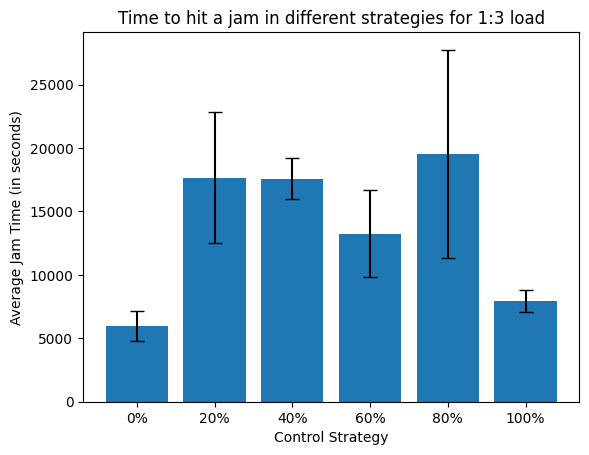

In [33]:
Cap = pd.read_csv("inc_MaxCap.csv", header=0, index_col=0)
sim_end_time = Cap.mean(axis=1)
sim_end_time_std = Cap.std(axis=1)
fig = plt.figure()
Cap_name = ["0%","20%", "40%", "60%", "80%","100%"]

fig, ax = plt.subplots()
ax.bar(Cap_name, sim_end_time, yerr=sim_end_time_std, capsize=5)  # capsize specifies the width of the caps on the error bars
ax.set_xlabel("Control Strategy")
ax.set_ylabel("Average Jam Time (in seconds)")
ax.set_title("Time to hit a jam in different strategies for 1:3 load")
plt.show()